# 16- Splitting a string into multiple columns

In [19]:
# import libraries
import pandas as pd

df = pd.DataFrame({'Name':['Abdullah Ahmad', 'Ali Afzal', 'Abu Bakkar', 'Muhammad Sajjad'],
                   'Location':['Lahore, Pakistan', 'Islamabad, Pakistan', 'Karachi, Pakistan', 'Hamburg, Germany']})
df

,Name,Location
0,Abdullah Ahmad,"Lahore, Pakistan"
1,Ali Afzal,"Islamabad, Pakistan"
2,Abu Bakkar,"Karachi, Pakistan"
3,Muhammad Sajjad,"Hamburg, Germany"


In [20]:
# 1 Split into multiple columns
df2 = df['Name'].str.split(' ', expand=True)
df2.columns = ['First Name', 'Second Name'] # change columns name
df2

,First Name,Second Name
0,Abdullah,Ahmad
1,Ali,Afzal
2,Abu,Bakkar
3,Muhammad,Sajjad


In [21]:
df[["First Name", "Last Name"]] = df['Name'].str.split(' ', expand=True)
df

,Name,Location,First Name,Last Name
0,Abdullah Ahmad,"Lahore, Pakistan",Abdullah,Ahmad
1,Ali Afzal,"Islamabad, Pakistan",Ali,Afzal
2,Abu Bakkar,"Karachi, Pakistan",Abu,Bakkar
3,Muhammad Sajjad,"Hamburg, Germany",Muhammad,Sajjad


In [22]:
df[["City", "Country"]] = df['Location'].str.split(', ', expand=True)
df

,Name,Location,First Name,Last Name,City,Country
0,Abdullah Ahmad,"Lahore, Pakistan",Abdullah,Ahmad,Lahore,Pakistan
1,Ali Afzal,"Islamabad, Pakistan",Ali,Afzal,Islamabad,Pakistan
2,Abu Bakkar,"Karachi, Pakistan",Abu,Bakkar,Karachi,Pakistan
3,Muhammad Sajjad,"Hamburg, Germany",Muhammad,Sajjad,Hamburg,Germany


In [23]:
# Refine dataset
df = df[['First Name', 'Last Name', 'City', 'Country']]
df

,First Name,Last Name,City,Country
0,Abdullah,Ahmad,Lahore,Pakistan
1,Ali,Afzal,Islamabad,Pakistan
2,Abu,Bakkar,Karachi,Pakistan
3,Muhammad,Sajjad,Hamburg,Germany


# 17- Aggregate by multiple groups/function

In [24]:
# libraries 
import pandas as pd
import seaborn as sns\

# load dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
df.groupby('who').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [28]:
df.groupby('who').sum()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
who,,,,,,,,
child,49,218,528.67,144,105,2721.2210,0,6
man,88,1274,13700.50,159,82,13352.0656,537,410
woman,205,565,6976.00,163,153,12620.6627,0,121


In [30]:
df.groupby(['sex', 'class', 'who']).count()

survived  pclass  age  sibsp  parch  fare  embarked  \
sex    class  who                                                          
female First  child         3       3    3      3      3     3         3   
              man           0       0    0      0      0     0         0   
              woman        91      91   82     91     91    91        89   
       Second child        10      10   10     10     10    10        10   
              man           0       0    0      0      0     0         0   
              woman        66      66   64     66     66    66        66   
       Third  child        30      30   30     30     30    30        30   
              man           0       0    0      0      0     0         0   
              woman       114     114   72    114    114   114       114   
male   First  child         3       3    3      3      3     3         3   
              man         119     119   98    119    119   119       119   
              woman         0       0    0      0      0     0         0   
       Second child         9       9    9      9      9     9         9   
              man          99      99   90     99     99    99        99   
              woman         0       0    0      0      0     0         0   
       Third  child        28      28   28     28     28    28        28   
              man         319     319  225    319    319   319       319   
              woman         0       0    0      0      0     0         0   

                     adult_male  deck  embark_town  alive  alone  
sex    class  who                                                 
female First  child           3     3            3      3      3  
              man             0     0            0      0      0  
              woman          91    78           89     91     91  
       Second child          10     1           10     10     10  
              man             0     0            0      0      0  
              woman          66     9           66     66     66  
       Third  child          30     2           30     30     30  
              man             0     0            0      0      0  
              woman         114     4          114    114    114  
male   First  child           3     3            3      3      3  
              man           119    91          119    119    119  
              woman           0     0            0      0      0  
       Second child           9     3            9      9      9  
              man            99     3           99     99     99  
              woman           0     0            0      0      0  
       Third  child          28     1           28     28     28  
              man           319     5          319    319    319  
              woman           0     0            0      0      0

# 18- select specific rows or column

In [31]:
# 1 select column
df[['age', 'who']]

,age,who
0,22.0,man
1,38.0,woman
2,26.0,woman
3,35.0,woman
4,35.0,man
...,...,...
886,27.0,man
887,19.0,woman
888,NaN,woman
889,26.0,man


In [33]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
df.loc['145': '149']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
145,0,2,male,19.0,1,1,36.7500,S,Second,man,True,NaN,Southampton,no,False
146,1,3,male,27.0,0,0,7.7958,S,Third,man,True,NaN,Southampton,yes,True
147,0,3,female,9.0,2,2,34.3750,S,Third,child,False,NaN,Southampton,no,False
148,0,2,male,36.5,0,2,26.0000,S,Second,man,True,F,Southampton,no,False
149,0,2,male,42.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


In [39]:
df.describe().loc[['min', '25%', '50%', '75%', 'max']]
# df.describe().loc['min':'max']

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [40]:
df.describe().loc['min':'max', 'survived':'age']

,survived,pclass,age
min,0.0,1.0,0.420
25%,0.0,2.0,20.125
50%,0.0,3.0,28.000
75%,1.0,3.0,38.000
max,1.0,3.0,80.000


# 19- Reshape multiindex series

In [41]:
df.survived.mean()

0.3838383838383838

In [43]:
df.groupby('who').survived.mean()

who
child    0.590361
man      0.163873
woman    0.756458
Name: survived, dtype: float64

In [49]:
df.groupby(['who', 'class']).survived.mean().unstack()

class,First,Second,Third
who,,,
child,0.833333,1.000000,0.431034
man,0.352941,0.080808,0.119122
woman,0.978022,0.909091,0.491228


# 20- Continuous to catogirical data conversion

In [56]:
#creating bins
pd.cut(df.age, bins = [0, 18, 25, 99], labels=['child', 'young', 'adult'])
df['new_age'] = pd.cut(df.age, bins = [0, 18, 25, 99], labels=['child', 'young', 'adult'])
df
# df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,young
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult


# 21- convert one set of values into anotherone

In [57]:
df['gender'] = df.sex.map({'male':0, 'female':1})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,gender
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,0


In [58]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [67]:
df['embarked_num'] = df.embarked.factorize()[0]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,gender,embarked_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,0,0


# 22- transpose a wide dataframe

In [69]:
import numpy as np
import pandas as pd

In [70]:
# creating a random dataframe
df = pd.DataFrame(np.random.rand(200,26), columns=list('abcdefghijklmnopqrstuvwxyz'))
df.head(10)

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,0.805053,0.970728,0.686995,0.078348,0.469129,0.921814,0.450677,0.123867,0.152522,0.463163,...,0.971165,0.430783,0.664881,0.466452,0.975781,0.875343,0.755681,0.263862,0.786802,0.595045
1,0.285776,0.257505,0.935295,0.234737,0.581672,0.054910,0.381791,0.813498,0.388875,0.684594,...,0.521254,0.301502,0.824674,0.002737,0.258096,0.355659,0.467945,0.011349,0.473780,0.403420
2,0.033435,0.523425,0.562476,0.982415,0.435846,0.933497,0.926010,0.703959,0.583239,0.196181,...,0.322507,0.007771,0.114669,0.327157,0.289702,0.020841,0.135271,0.738112,0.162020,0.688238
3,0.172411,0.611962,0.102749,0.618593,0.751426,0.938846,0.868672,0.969952,0.718452,0.243524,...,0.965649,0.829291,0.621173,0.246759,0.550479,0.227222,0.681919,0.799631,0.482779,0.971841
4,0.004131,0.997827,0.926834,0.423045,0.297309,0.492526,0.441394,0.775423,0.865682,0.803435,...,0.864938,0.728896,0.592564,0.911834,0.731949,0.086545,0.358830,0.587997,0.531435,0.524374
5,0.071710,0.772042,0.974017,0.371808,0.712258,0.739750,0.735228,0.432758,0.662014,0.063303,...,0.061499,0.244889,0.382910,0.475093,0.000747,0.883433,0.841767,0.036396,0.563742,0.863807
6,0.370237,0.557416,0.762006,0.300767,0.629464,0.674185,0.503040,0.878844,0.477104,0.144685,...,0.965939,0.221052,0.431421,0.283494,0.107513,0.588003,0.269526,0.892783,0.528351,0.783124
7,0.567888,0.043664,0.604432,0.295941,0.963443,0.538982,0.549523,0.593784,0.446390,0.315818,...,0.620963,0.062115,0.980984,0.753790,0.737614,0.829314,0.515515,0.483458,0.501806,0.256904
8,0.138749,0.934819,0.358391,0.080675,0.997751,0.481751,0.259459,0.727446,0.079519,0.256062,...,0.794247,0.094863,0.214892,0.307301,0.730808,0.454814,0.187705,0.608324,0.439541,0.915821
9,0.922390,0.364675,0.711168,0.105961,0.109702,0.475846,0.870934,0.359796,0.979752,0.159465,...,0.478638,0.705757,0.700302,0.622318,0.863754,0.718615,0.303244,0.123066,0.652093,0.159257


In [71]:
# convert row into column and column into row (transpose)
df.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
a,0.805053,0.285776,0.033435,0.172411,0.004131,0.071710,0.370237,0.567888,0.138749,0.922390,...,0.243868,0.975632,0.801211,0.646588,0.899663,0.814567,0.725374,0.819289,0.986564,0.114605
b,0.970728,0.257505,0.523425,0.611962,0.997827,0.772042,0.557416,0.043664,0.934819,0.364675,...,0.055325,0.377672,0.502499,0.285145,0.185156,0.212436,0.853374,0.408217,0.473782,0.142086
c,0.686995,0.935295,0.562476,0.102749,0.926834,0.974017,0.762006,0.604432,0.358391,0.711168,...,0.133465,0.851566,0.110697,0.591375,0.895533,0.076435,0.972383,0.343165,0.363914,0.829169
d,0.078348,0.234737,0.982415,0.618593,0.423045,0.371808,0.300767,0.295941,0.080675,0.105961,...,0.248541,0.647333,0.694438,0.697536,0.845329,0.497398,0.641572,0.808164,0.457946,0.338643
e,0.469129,0.581672,0.435846,0.751426,0.297309,0.712258,0.629464,0.963443,0.997751,0.109702,...,0.153527,0.321318,0.817103,0.559820,0.737850,0.993651,0.273247,0.526082,0.301694,0.686286
f,0.921814,0.054910,0.933497,0.938846,0.492526,0.739750,0.674185,0.538982,0.481751,0.475846,...,0.526723,0.561117,0.925163,0.084856,0.593032,0.153662,0.608742,0.567131,0.845676,0.377319
g,0.450677,0.381791,0.926010,0.868672,0.441394,0.735228,0.503040,0.549523,0.259459,0.870934,...,0.199646,0.086100,0.615307,0.873254,0.702984,0.416898,0.003911,0.355423,0.285943,0.146163
h,0.123867,0.813498,0.703959,0.969952,0.775423,0.432758,0.878844,0.593784,0.727446,0.359796,...,0.790315,0.514557,0.412865,0.355706,0.595884,0.503165,0.340827,0.780540,0.052112,0.024920
i,0.152522,0.388875,0.583239,0.718452,0.865682,0.662014,0.477104,0.446390,0.079519,0.979752,...,0.582416,0.802203,0.759964,0.623061,0.778168,0.556836,0.154046,0.418367,0.819057,0.995997
j,0.463163,0.684594,0.196181,0.243524,0.803435,0.063303,0.144685,0.315818,0.256062,0.159465,...,0.959522,0.571384,0.540369,0.396820,0.875630,0.966247,0.169607,0.502317,0.661889,0.518710


# 23- Reshaping a dataframe

In [72]:
distance = pd.DataFrame([['12345', 100, 200, 300], ['34567', 400, 500, 600], ['67890', 700, 800, 900]],
                          columns=['zip', 'factory', 'warehouse', 'retail'])
distance.head()

,zip,factory,warehouse,retail
0,12345,100,200,300
1,34567,400,500,600
2,67890,700,800,900


In [75]:
fasla_long = distance.melt(id_vars='zip', var_name='location_type', value_name='distance')
fasla_long

,zip,location_type,distance
0,12345,factory,100
1,34567,factory,400
2,67890,factory,700
3,12345,warehouse,200
4,34567,warehouse,500
5,67890,warehouse,800
6,12345,retail,300
7,34567,retail,600
8,67890,retail,900


<AxesSubplot:xlabel='zip', ylabel='distance'>

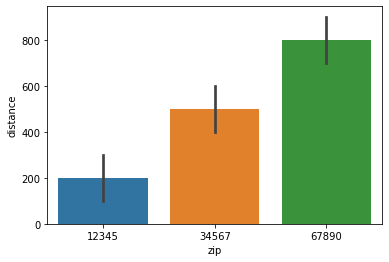

In [78]:
sns.barplot(x='zip', y='distance', data=fasla_long)

<AxesSubplot:xlabel='zip', ylabel='distance'>

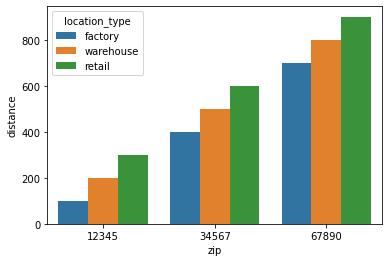

In [79]:
sns.barplot(x='zip', y='distance', hue='location_type', data=fasla_long)